In [1]:
import pyJvsip as pv
from exUtils import *
from math import pi as M_PI
from math import cos as cos
%matplotlib inline
import matplotlib.pyplot as plt

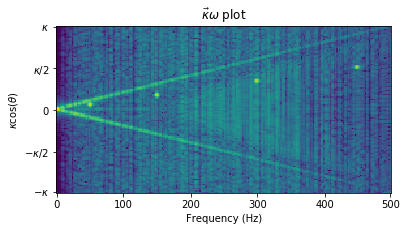

In [2]:
# define parameters
D=1.5        # Sensor Spacing Meters
Fs=1000.0    # Sample Frequency (Hz)
F0=450.0     # Target Frequency
F1=300.0     # Target Frequency
F2=150.0     # Target Frequency
F3=50.0      # Target Frequency
Theta_o=40   # Target Direction
Ns=512       # length of sampled time series (samples)
Nn=1024      # length of (simulated) noise series
Mp=128       # number of sensors in linear array
c=1500.0     # Propagation Speed (Meters/Second)
# Calculate input data
alpha = (D * Fs) / c #Array Constant
data = noiseGen('mview_d',alpha,Mp,Nn,Ns)
targets=[(F0,Theta_o,1.5),(F1,Theta_o,2.0),(F2,Theta_o,2.0),(F3,Theta_o,3.0)]
narrowBandGen(data,alpha,targets,Fs)
# beamform data and output in a form sutiable for display
ccfftmip = pv.FFT('ccfftmip_d',(Mp,int(Ns/2) + 1,pv.VSIP_FFT_FWD,1,pv.VSIP_COL,0,0))
windowt=pv.create('vview_d',Ns).hanning
windowp=pv.create('vview_d',Mp).hanning
pv.vmmul(windowt.ROW,data,data) #window to reduce sidelobes
pv.vmmul(windowp.COL,data,data)  
gram_data=data.rcfft
ccfftmip.dft(gram_data)
gram = scale(gram_data)
# save data
view_store(gram,'gram_output')
fig = plt.figure()
ax = fig.add_subplot(111)
plt.imshow(gram.list,origin='lower')
ax.set_yticks([0,31,63,95,127])
ax.set_xticks([0,51,103,154,206,256])
ax.set_yticklabels([r'$-\kappa$','$-\kappa /2$','$0$','$\kappa /2$','$\kappa$'])
ax.set_xticklabels([' 0 ','100','200','300','400','500'])
ax.set_title(r'$\vec{\kappa}\omega$ plot')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel(r'$\kappa \cos(\theta)$') 